# **BIDSS Final Project - CIDM 5310-70**

*Created by Rex A. Herndon*

---

## **Phase Three - Business Intelligence Dashboard Story**

You will craft a dashboard within a Jupyter Notebook that provides the means for the user to explore, and find answers, to the questions you posed in Phase One.  Your dashboard will use any variety of visual analytics tools available in Pandas that we covered in the Pandas book, but not limited to the book, to build your story.  I expect that any best-practices and other knowledge will be employed here.

Deliverables: You will upload your Jupyter notebook file to this dropbox in addition to submitting your project file along with your project report.

---

In [ ]:
# creating initial connection to dataframes

# note for developer: when running this project, please sure to use the ".venv" environment instead of the "venv"

from sqlalchemy import create_engine
import pandas as pd
import os
from dotenv import load_dotenv

import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

load_dotenv()

conn_str = f'mysql+pymysql://{os.getenv("user")}:{os.getenv("passwd")}@{os.getenv("host")}:3306/{os.getenv("database")}'
engine = create_engine(conn_str)

# query = 'SELECT * from iris.data;'
# df = pd.read_sql(query, con=engine)
# df.head()

print("g2g")


g2g


# Importing, Cleaning and Preprocessing

In [ ]:
# importing and cleaning datasets

# note: running this cell can take several seconds to import dataframes, please be patient.
crashes = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
vehicles = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')

# converting to DataFrames
crashes = pd.DataFrame(crashes)
vehicles = pd.DataFrame(vehicles)

C:\Users\hernd\AppData\Local\Temp\ipykernel_9432\1991626687.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
C:\Users\hernd\AppData\Local\Temp\ipykernel_9432\1991626687.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles.csv')


In [ ]:
# previewing dataframes before processing

print(crashes.head())
print("\n------------------------------------------------------\n")
print(vehicles.head())
print("\n------------------------------------------------------\n")
print(f"Shape of Crashes: {crashes.shape}")
print(f"Shape of Vehicles: {vehicles.shape}")
print("\n------------------------------------------------------\n")

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1             

In [ ]:
print(f"Crashes dtypes: {crashes.dtypes}")
print("\n------------------------------------------------------\n")
print(f"Vehicles dtypes: {vehicles.dtypes}")

Crashes dtypes: CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64


In [ ]:
# more cleaning

# converting crash date to datetime
crashes['CRASH DATE'] = pd.to_datetime(crashes['CRASH DATE'])

# converting crashtime to seconds, so calculations can be done easier (and potentially faster)
crashes['CRASH TIME'] = crashes['CRASH TIME'] + ':00'
crashes['CRASH TIME'] = pd.to_timedelta(crashes['CRASH TIME'])
crashes['CRASH TIME'] = crashes['CRASH TIME'].dt.total_seconds().astype(int)

# dropping unnecessary columns (there's a lot)
crashes.drop([
    'BOROUGH',
    'ZIP CODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'ON STREET NAME',
    'CROSS STREET NAME',
    'OFF STREET NAME'
  ], axis=1, inplace=True)

# dropping rows where 'CONTRIBUTING FACTOR VEHICLE 1' is NULL
# dropping rows where 'NUMBER OF PERSONS INJURED' is NULL
# dropping rows where 'NUMBER OF PERSONS KILLED' is NULL
crashes.dropna(subset=[
    'CONTRIBUTING FACTOR VEHICLE 1',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'CRASH DATE',
    'CRASH TIME'], inplace=True)

crashes['NUMBER OF PERSONS INJURED'] = crashes['NUMBER OF PERSONS INJURED'].astype('int64')
crashes['NUMBER OF PERSONS KILLED'] = crashes['NUMBER OF PERSONS KILLED'].astype('int64')

In [ ]:
crashes.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                                int32
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4            object
CONTRIBUTING FACTOR VEHICLE 5            object
COLLISION_ID                              int64
VEHICLE TYPE CODE 1                      object
VEHICLE TYPE CODE 2                      object
VEHICLE TYPE CODE 3                      object
VEHICLE TYPE CODE 4                      object
VEHICLE TYPE CODE 5                     

In [ ]:
# doing same conversions to vehicles dataset as well

# converting crash date to datetime
vehicles['CRASH_DATE'] = pd.to_datetime(vehicles['CRASH_DATE'])

# converting crashtime to seconds, so calculations can be done easier (and potentially faster)
vehicles['CRASH_TIME'] = vehicles['CRASH_TIME'] + ':00'
vehicles['CRASH_TIME'] = pd.to_timedelta(vehicles['CRASH_TIME'])
vehicles['CRASH_TIME'] = vehicles['CRASH_TIME'].dt.total_seconds().astype(int)

# dropping unnecessary columns
vehicles.drop([
    'VEHICLE_ID',
    'STATE_REGISTRATION',
    'DRIVER_SEX',
    'DRIVER_LICENSE_STATUS',
    'DRIVER_LICENSE_JURISDICTION'
  ], axis=1, inplace=True)

vehicles.dropna(subset=[
    'VEHICLE_TYPE',
    'VEHICLE_MAKE',
    'VEHICLE_MODEL',
    'CRASH_DATE',
    'CRASH_TIME',
    'VEHICLE_YEAR',
    'VEHICLE_OCCUPANTS'], inplace=True)

vehicles['VEHICLE_YEAR'] = vehicles['VEHICLE_YEAR'].astype('int64')
vehicles['VEHICLE_OCCUPANTS'] = vehicles['VEHICLE_OCCUPANTS'].astype('int64')

In [ ]:
vehicles.dtypes

UNIQUE_ID                               int64
COLLISION_ID                            int64
CRASH_DATE                     datetime64[ns]
CRASH_TIME                              int32
VEHICLE_TYPE                           object
VEHICLE_MAKE                           object
VEHICLE_MODEL                          object
VEHICLE_YEAR                            int64
TRAVEL_DIRECTION                       object
VEHICLE_OCCUPANTS                       int64
PRE_CRASH                              object
POINT_OF_IMPACT                        object
VEHICLE_DAMAGE                         object
VEHICLE_DAMAGE_1                       object
VEHICLE_DAMAGE_2                       object
VEHICLE_DAMAGE_3                       object
PUBLIC_PROPERTY_DAMAGE                 object
PUBLIC_PROPERTY_DAMAGE_TYPE            object
CONTRIBUTING_FACTOR_1                  object
CONTRIBUTING_FACTOR_2                  object
dtype: object

## **Analysis and BI Dashboard Story: The Current State of Motor Vehicle Collisions in Urban Locations**

For this project, I explored and analyzed two datasets that were taken from NYC Open Data. These dataframes are records of each motor vehicle collision recorded by NYPD between March 2016 and December 2021, with some outlier records even going as far back as 2012. Each record contains detailed crash information, including information such as vehicles involved, casualties/injuries, location of each incident, vehicle damage, date and time, etc.

For this analysis, I wanted to identify the current state of motor vehicle collisions in densely populated urban areas, such as New York City. I wanted to retrieve information such as common reasons for vehicle collisions, the impact of them (ie. identifying casualties or injuries), common times for collisions to occur, and common vehicle types. The primary reason for doing this would be to visualize this information to other governments in urban areas and even stakeholders/executives for motor vehicle companies to help contribute to the reduction of motor vehicle collisions and car accidents in the future.

I asked/answered the following questions to help guide me along my analysis.

- What percentage of overall collisions lead to one or more injuries/fatalies?
- What are the primary contributing factors for vehicle collisions?
- Do vehicle collisions happen more during AM times or PM times?
- What is the main vehicle type involved in a collision?

The results of my findings will be posted and visualized below.

**What percentage of overall collisions lead to one or more injuries/fatalies?**

In [ ]:
# total rows
total_val_count = crashes.shape[0]
# total injuries recorded
injury_sum = crashes['NUMBER OF PERSONS INJURED'].sum()
# total deaths recorded
death_sum = crashes['NUMBER OF PERSONS KILLED'].sum()
# filtered where it counts the number of rows that have at least 1 person injured in a collision
injury_count_cond = crashes[crashes['NUMBER OF PERSONS INJURED'] > 1]['NUMBER OF PERSONS INJURED'].count()
# filtered where it counts the number of rows that have at least 1 person killed in a collision
death_count_cond = crashes[crashes['NUMBER OF PERSONS KILLED'] > 1]['NUMBER OF PERSONS KILLED'].count()

In [ ]:
injury_percentage_atLeastOne = (injury_count_cond/total_val_count)*100
death_percentage_atLeastOne = (death_count_cond/total_val_count)*100
injury_percentage_overall = (injury_sum/total_val_count)*100
death_percentage_overall = (death_sum/total_val_count)*100
overall = 100

In [ ]:
print(f"Total collisions recorded in dataset: {total_val_count}")
print(f"Total injuries found in dataset: {injury_sum}")
print(f"Total deaths found in dataset: {death_sum}")
print("\n")
print(f"Percentage of collisions that result in at least one injury: {injury_percentage_atLeastOne:.2f}%")
print(f"Percentage of collisions that result in at least one death: {death_percentage_atLeastOne:.4f}%")
print("\n")
print(f"Overall percentage of injuries in dataset: {injury_percentage_overall:.3f}%")
print(f"Overall percentage of deaths in dataset: {death_percentage_overall:.2f}%")

Total collisions recorded in dataset: 2002689
Total injuries found in dataset: 600901
Total deaths found in dataset: 2867


Percentage of collisions that result in at least one injury: 4.98%
Percentage of collisions that result in at least one death: 0.0044%


Overall percentage of injuries in dataset: 30.005%
Overall percentage of deaths in dataset: 0.14%


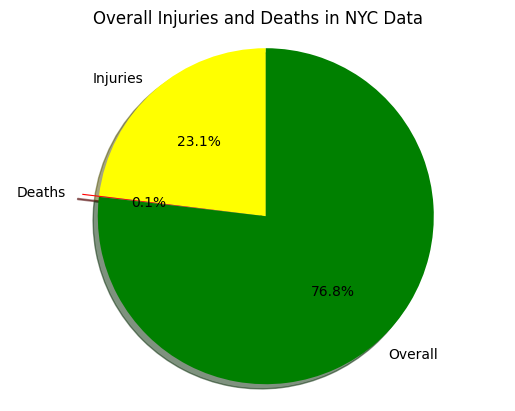

In [ ]:
Q1_data = [injury_percentage_overall, death_percentage_overall, overall]
labels = 'Injuries', 'Deaths', 'Overall'
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(Q1_data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors=['yellow', 'red', 'green'])
ax1.axis('equal')
plt.title("Overall Injuries and Deaths in NYC Data")

plt.show()

The percentage of collisions that had at least one injury (4.97%) and one death (0.0044%) was too small to visualize, but we were able to find and visualize the overall percentage of deaths and collisions found in this dataset.

Suprisingly, we found that only about 0.14% of people (2863 casualties) in this dataset died in a motor vehicle collision or car accident. Unsuprisingly, however, 23.1% of people were found to be injured in a motor vehicle collision. For an urban environment with a densely populated area like New York, it's good that the rates for deaths and injuries here are this low between 2016 and 2021.

**What are the primary contributing factors for vehicle collisions?**

In [ ]:
# grouping by the count of each value in "CONTRIBUTING FACTOR VEHICLE 1", since there is
# always at least one vehicle in every collision

contributing_factor_count = crashes.groupby('CONTRIBUTING FACTOR VEHICLE 1')['CONTRIBUTING FACTOR VEHICLE 1'].count()
sorting_factors = contributing_factor_count.sort_values(ascending=False)
Q2_data = sorting_factors.head()
sorting_factors.head(5)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       690394
Driver Inattention/Distraction    399011
Failure to Yield Right-of-Way     118608
Following Too Closely             106857
Backing Unsafely                   74775
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

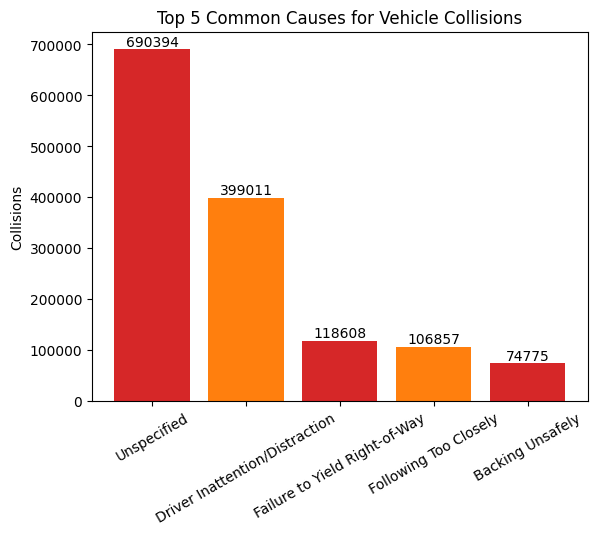

In [ ]:
Q2_data
y_pos = np.arange(len(Q2_data))
labels = 'Unspecified', 'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Backing Unsafely'
bar_colors = ['tab:red', 'tab:orange', 'tab:red', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()

# adding numbers to bar chart
for i, value in enumerate(Q2_data):
    plt.text(i, value, str(value), ha='center', va='bottom')

ax.bar(labels, Q2_data, color=bar_colors)
plt.xticks(rotation = 30)
# plt.figure(figsize=(15, 6))
ax.set_ylabel('Collisions')
ax.set_title("Top 5 Common Causes for Vehicle Collisions")

plt.show()

In this graph, you can see that almost 700,000 collisions report an unspecified common cause, but we will ignore this in our analysis.

Beside that, we can see that the number one identified cause of motor vehicle collisions for NYC is distracted driving, followed by failures to yield, following too closely, and backing unsafely. With the lead cause of distracted driving or failing to pay attention, this is reasonable because of the surrounding environment or even because of technology like our phones. Constantly, we are met with warnings and PSAs discouraging texting while driving because of statistics like these.

**Do vehicle collisions happen more during AM times or PM times?**

In [ ]:
# crash times were changed to seconds for easier calculations on this question

# declaring noon variable = 60 seconds * 60 minutes * 12 hours
noon = 60*60*12
midnight = noon*2

AM_collisions = crashes[crashes['CRASH TIME'] < noon].shape[0]
PM_collisions = crashes[crashes['CRASH TIME'] > noon].shape[0]

AM_percent = (AM_collisions/total_val_count)*100
PM_percent = (PM_collisions/total_val_count)*100

print(f"Total number of collisions recorded in AM times: {AM_collisions}")
print(f"Total number of collisions recorded in PM times: {PM_collisions}")
print("\n")
print(f"Percentage of collisions recorded in AM times: {AM_percent:.2f}%")
print(f"Percentage of collisions recorded in PM times: {PM_percent:.2f}%")

Total number of collisions recorded in AM times: 726444
Total number of collisions recorded in PM times: 1255350


Percentage of collisions recorded in AM times: 36.27%
Percentage of collisions recorded in PM times: 62.68%


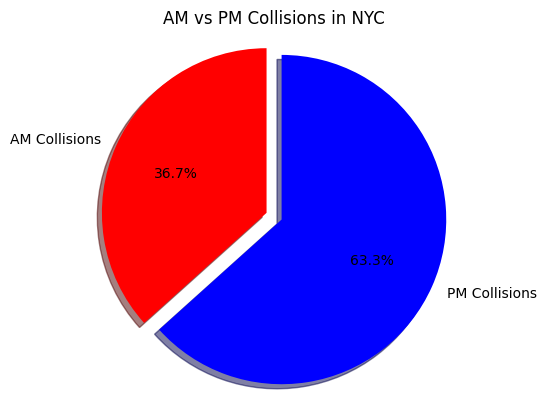

In [ ]:
Q3_data = [AM_collisions, PM_collisions]
labels = 'AM Collisions', 'PM Collisions'
explode = (0, 0.1)

fig, ax = plt.subplots()
ax.pie(Q3_data, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors=['red', 'blue'])
ax.axis('equal')
plt.title("AM vs PM Collisions in NYC")

plt.show()

From this chart, we can see that around 2/3's of all collisions recorded happen during PM times, while the remaining 1/3rd of collision happen during the AM time. This may not be suprising, especially if the collisions happen at night because of the driver's obscured vision and more people driving after noon as well. In total, there were 726,444 collisions happening between midnight and noon, while there were 1,255,350 happening between noon and midnight.

**What is the main vehicle type involved in a collision?**

In [ ]:
# displays top 3 records in each category

vehicletype_count = vehicles.groupby('VEHICLE_TYPE')['VEHICLE_TYPE'].count()
sorted_count1 = vehicletype_count.sort_values(ascending=False)
Q4_1_data = sorted_count1.head(3)
Q4_1_data

VEHICLE_TYPE
4 dr sedan                             23412
Station Wagon/Sport Utility Vehicle    15506
Sedan                                   1793
Name: VEHICLE_TYPE, dtype: int64

In [ ]:
vehiclemodel_count = vehicles.groupby('VEHICLE_MODEL')['VEHICLE_MODEL'].count()
sorted_count2 = vehiclemodel_count.sort_values(ascending=False)
Q4_2_data = sorted_count2.head(3)
Q4_2_data

VEHICLE_MODEL
TOYT CAM    2989
HOND ACC    1764
NISS ALT    1492
Name: VEHICLE_MODEL, dtype: int64

In [ ]:
vehiclemake_count = vehicles.groupby('VEHICLE_MAKE')['VEHICLE_MAKE'].count()
sorted_count3 = vehiclemake_count.sort_values(ascending=False)
Q4_3_data = sorted_count3.head(3)
Q4_3_data

VEHICLE_MAKE
TOYT -CAR/SUV    8598
HOND -CAR/SUV    5886
NISS -CAR/SUV    5240
Name: VEHICLE_MAKE, dtype: int64

Note: Three different bar charts will be shown here, since the dataset breaks these vehicles down between vehicle type, make and model (and year, which is not shown here).

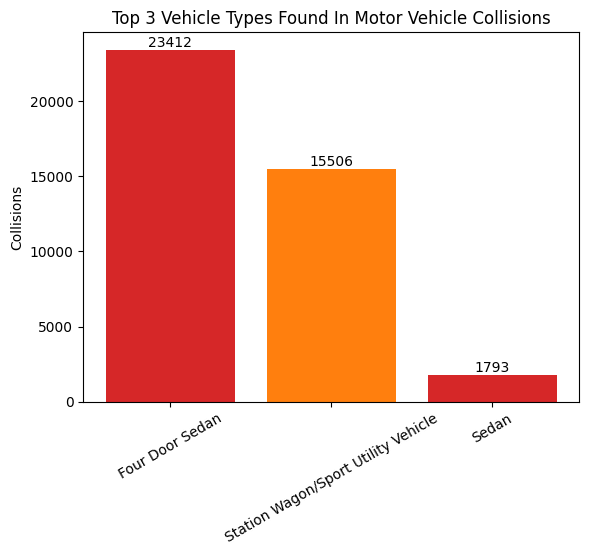

In [ ]:
# vehicle type

Q4_1_data
y_pos = np.arange(len(Q4_1_data))
labels = 'Four Door Sedan', 'Station Wagon/Sport Utility Vehicle', 'Sedan'
bar_colors = ['tab:red', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()

# adding numbers to bar chart
for i, value in enumerate(Q4_1_data):
    plt.text(i, value, str(value), ha='center', va='bottom')

ax.bar(labels, Q4_1_data, color=bar_colors)
plt.xticks(rotation = 30)
# plt.figure(figsize=(15, 6))
ax.set_ylabel('Collisions')
ax.set_title("Top 3 Vehicle Types Found In Motor Vehicle Collisions")

plt.show()

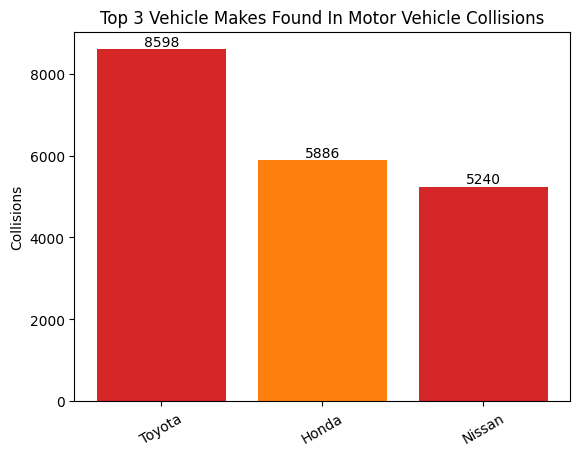

In [ ]:
# vehicle make

Q4_3_data
y_pos = np.arange(len(Q4_3_data))
labels = 'Toyota', 'Honda', 'Nissan'
bar_colors = ['tab:red', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()

# adding numbers to bar chart
for i, value in enumerate(Q4_3_data):
    plt.text(i, value, str(value), ha='center', va='bottom')

ax.bar(labels, Q4_3_data, color=bar_colors)
plt.xticks(rotation = 30)
# plt.figure(figsize=(15, 6))
ax.set_ylabel('Collisions')
ax.set_title("Top 3 Vehicle Makes Found In Motor Vehicle Collisions")

plt.show()

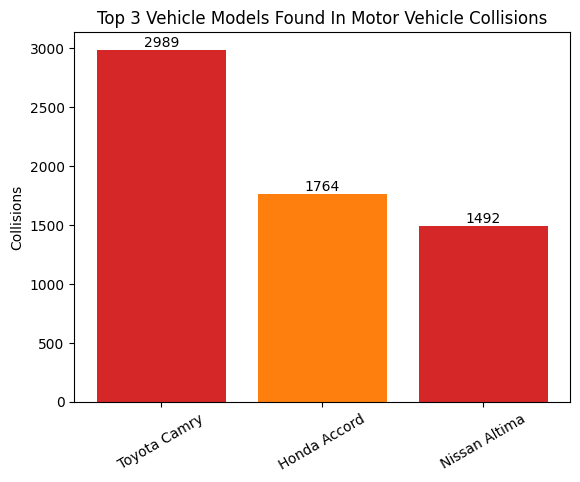

In [ ]:
# vehicle model

Q4_2_data
y_pos = np.arange(len(Q4_2_data))
labels = 'Toyota Camry', 'Honda Accord', 'Nissan Altima'
bar_colors = ['tab:red', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()

# adding numbers to bar chart
for i, value in enumerate(Q4_2_data):
    plt.text(i, value, str(value), ha='center', va='bottom')

ax.bar(labels, Q4_2_data, color=bar_colors)
plt.xticks(rotation = 30)
# plt.figure(figsize=(15, 6))
ax.set_ylabel('Collisions')
ax.set_title("Top 3 Vehicle Models Found In Motor Vehicle Collisions")

plt.show()

As we can see from these graphs, we can gather the following information:

- For vehicle types, we can see that the top 3 types of vehicles found in a motor vehicle collision are 4 door sedans, station wagons/sport utility vehicles and regular sedans.
- For vehicle makes, we can see that the three most common vehicle makes are from Toyota, Honda or Nissan.
- For vehicle models, the three most common vehicles for motor vehicle collisions are the Toyota Camry, Honda Accord and Nissan Altima.

It's no suprise that these three vehicles are also some of the most popular and common vehicle choices for people across the US as well, but our hope is that these companies will implement technologies or adopt existing tech (such as rear-view cameras) in their future vehicle models to help reduce collisions in the future.

An additional summary for this project will also be provided in a seperate file.